In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def exponential(t, N0, alpha):
    return N0*np.exp(-alpha*t)

$$ N(t) = N_0 e^{-\lambda t} $$

0.8846907741903202 0.7035883943872863


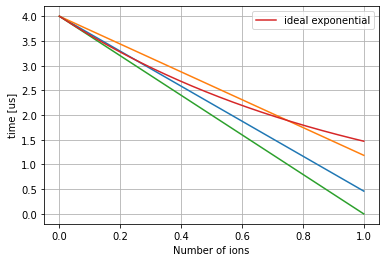

In [77]:
rate = 1 # MHz
N0 = 4 # number of ions
N_values = 1000 # number of points

max_time = 1 # us

t_values = np.linspace(0,max_time, N_values)
N = [exponential(t, N0, rate) for t in t_values]

first_fit_position = int(0.25/max_time*N_values)
second_fit_position = int(0.75/max_time*N_values)-1

fit1 = (N[0]-N[first_fit_position])/(t_values[first_fit_position])
fit2 = (N[0]-N[second_fit_position])/(t_values[second_fit_position])

print(fit1/N[0], fit2/N[0])

plt.plot([0, 1], [N[0], N[0]-fit1])
plt.plot([0, 1], [N[0], N[0]-fit2])
plt.plot([0, 1], [N[0], N[0]-rate*N[0]])
plt.plot(t_values, N, label="ideal exponential")
plt.xlabel("Number of ions")
plt.ylabel("time [us]")
plt.legend()
plt.grid()



plt.show()

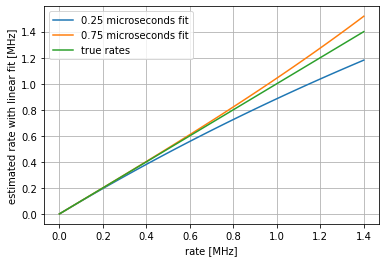

In [98]:
rates = np.linspace(0, 1.4, 100)
N0 = 4 # number of ions
N_values = 1000 # number of points
max_time = 1 # us

estimated1 = [] # rates estimated between 0 and 0.25 us
estimated2 = [] # rates estimated between 0 and 1 us

for rate in rates:

    t_values = np.linspace(0,max_time, N_values)
    N = [exponential(t, N0, rate) for t in t_values]

    first_fit_position = int(0.25/max_time*N_values)
    second_fit_position = int(1/max_time*N_values)-1

    fit1 = (N[0]-N[first_fit_position])/(t_values[first_fit_position])
    fit2 = (N[0]-N[second_fit_position])/(t_values[second_fit_position])

    estimated1.append(fit1/N[int(0/max_time*N_values)])
    estimated2.append(fit2/N[int(0.5/max_time*N_values)])

plt.plot(rates, estimated1, label="0.25 microseconds fit")
plt.plot(rates, estimated2, label="0.75 microseconds fit")
plt.plot(rates, rates, label="true rates")
plt.legend()
plt.xlabel("rate [MHz]")
plt.ylabel("estimated rate with linear fit [MHz]")
plt.grid()

plt.show()